# 14wk-2: 클래스 (4)

최규빈  
2024-06-07

<a href="https://colab.research.google.com/github/guebin/PP2024/blob/main/posts/14wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-xPCf2gHfHWYZEFD_0R-GnH&si=tZKvytis8R4Ke5YT>

# 2. Imports

In [9]:
import time
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# 3. 코딩 문해력

## A. 수용력과 이해력

`-` 수용력 테스트1: 2주차-2

$f(x)=x^2$위의 임의의 점을 입력하면 접선을 리턴하는 함수를 구현하라.

In [9]:
def make_func(x0):
    f = lambda x: x**2
    def func(x):
        h = 0.0001
        a = (f(x0+h)-f(x0))/h 
        return a*(x-x0) + f(x0)
    return func

이거…. 얼마전에 배운내용이었음..

`-` 수용력 테스트2: map + list

In [13]:
f = lambda x: max(x)
x1 = [1,1,2]
x2 = [2,3,6,8]
x3 = [4,5,10,15]
list(map(f,[x1,x2,x3]))  # [f(x1), f(x2), f(x3)]

`-` 이해력 테스트1: `map()`으로 생성된 인스턴스는 iterable

In [14]:
for i in map(f,[x1,x2,x3]):
    print(i)

2
8
15

`-` 이해력 테스트2: `str`은 callable

In [15]:
str(1)

In [18]:
str.__call__(1)

In [20]:
list(map(str,[1,2,3]))

`-` 이해력 테스트3: `"+".join(??)` 자리에 올 수 있는건?

In [26]:
"+".join(list(map(str,[1,2,3])))

In [30]:
"+".join(map(str,[1,2,3]))

## B. 흡수력과 활용력

In [32]:
att = np.random.choice(np.arange(10,21)*5,20); rep = np.random.choice(np.arange(5,21)*5,20); mid = np.random.choice(np.arange(0,21)*5,20); fin = np.random.choice(np.arange(0,21)*5,20)
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin})[:5]
df

`-` 흡수력 테스트: 이거 보고 바로 구조가 이해되면 흡수력이 좋은것임

In [35]:
df.apply({'att': lambda x: x+1})

In [37]:
def func(x):
    return "메롱"
df.apply({'att': func})

`-` 활용력 테스트: 위의코드를 보고 이 코드까지 떠올릴 수 있으면
문일지십의 단계

In [46]:
float.__call__(1) # float은 callable

In [48]:
df.apply({'att': float})

이 경지를 얻는게 중요함. 이 경지를 얻지 못하면 아래와 같은 코드를
외워야함.

In [53]:
df[['att']].astype(float)

저것도 모른다면 아래처럼 컴프리헨션을 활용해야겠죠..

In [56]:
[float(l) for l in df.att]

In [61]:
_df = pd.DataFrame([float(l) for l in df.att])
_df.columns = ['att']
_df

절망 그 자체의 코드

In [76]:
lst = [] 
for i in range(len(df.att)):
    lst.append(float(df.att.iloc[i]))
lst

In [77]:
_df = pd.DataFrame(lst)
_df.columns = ['att']
_df

> 수용력 $\to$ 이해력 $\to$ 흡수력 $\to$ 활용력

# 4. 함수

## A. 대표예시

`# 예제1` – 은근히 짜증나는 `plt.plot()`

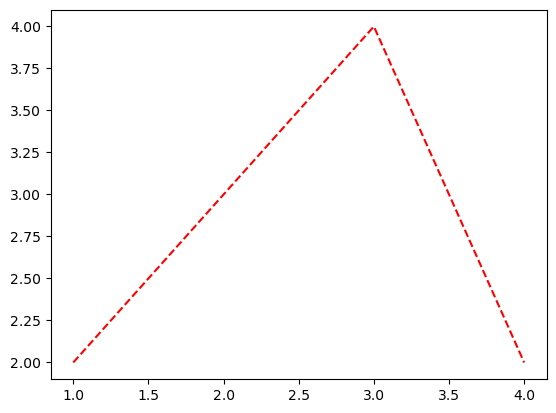

In [82]:
plt.plot([1,2,3,4],[2,3,4,2],'r--')

In [91]:
plt.plot([1,2,3,4],[2,3,4,2],color='lime','--')

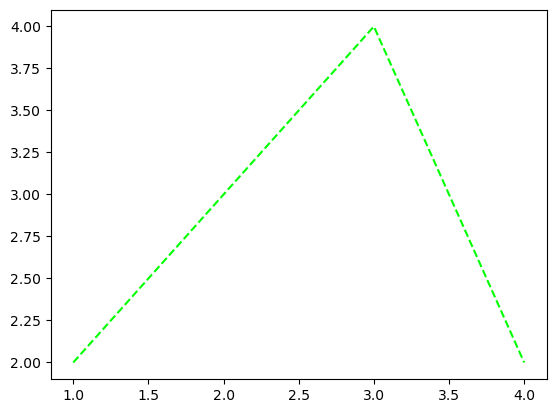

In [92]:
plt.plot([1,2,3,4],[2,3,4,2],'--',color='lime')

`#`

## B. 개념

`# 예시1` – 함수사용시, 함수의 입력값을 전달하는 두가지 방식, 원칙1

`-` 함수 사용시, 함수의 입력값을 전달하는 두가지 방식은 아래와 같다.

In [96]:
def func(x,y):
    return x**y 

In [97]:
func(2,3) # 이렇게 입력하는 경우

In [98]:
func(x=2,y=3) # 이렇게 입력하는 경우

`-` 여기에서 `func(2,3)`와 같이 사용할때, 함수의 입력값을 위치인자로
전달했다고 한다. 이는 컴퓨터가 입력값 2,3이 있는 위치에 따라서 x,y를
할당한다는 의미이다. 즉 앞에있는걸 x로 뒤에있는걸 y로 받는다는 의미이다.
따라서 `func(2,3)`와 `func(3,2)`는 다르게 동작한다.

In [99]:
func(2,3), func(3,2)

`-` `func(x=2,y=3)`와 같이 사용하면, 함수의 입력값을 키워드인자로
전달했다고 한다. 이는 컴퓨터가 입력값의 위치에 따라 x,y를 할당하는게
아닌 키워드값 자체를 보고 할당한다는 것이다. 따라서 `func(x=2,y=3)` 와
`func(y=3,x=2)`는 같은 동작을 한다.

In [101]:
func(x=2,y=3), func(y=3,x=2)

`-` 위치인자와 키워드인자를 이해할때 위치인자는 입력을 튜플로
키워드인자는 입력을 딕셔러니로 생각하면 편리하다.

In [110]:
tpl = (2,3)
func(*tpl)

In [111]:
tpl = (3,2)
func(*tpl)

In [118]:
dct = dict(x=2,y=3) 
func(**dct)

In [119]:
dct = dict(y=3,x=2) 
func(**dct)

> 원칙1: 위치인자의 입력은 튜플로, 키워드인자의 입력은 딕셔너리로
> 생각한다.

`#`

`# 예시2` – 함수를 정의할때, 입력값을 정의하는 두가지 방식, 원칙2,3

`-` 함수를 정의할때, 함수의 입력값을 아래와 같이 기본값을 주어 정의할 수
있다.

In [120]:
def jump(x,y=1):
    return x+y

In [122]:
jump(5)

> 원칙2: 미리정의된 입력값은 생략가능하다 –\> 미리 정의된
> 키워드인자(=기본값을 가지고 있는 키워드인자)는 생략가능하다.

In [125]:
jump(3,5) # x=1,y=2 라는 의미

`-` 이때 x는 위치인자로 정의되었다고 하고, y는 키워드 인자로
정의되었다고 표현한다. 그래서 엄밀하게 개념상으로는 아래와 같다.

``` python
def func(x,y): # x,y는 모두 위치인자로 정의되었음. 
    return x**y 
```

``` python
def jump(x,y=1): # x는 위치인자로, y는 키워드 인자로 정의되었음. 
    return x+y
```

`-` 이러한 설명은 와닿지 않는데, 위치인자로 정의되었다고 해도 그걸
키워드인자로 모두 쓸 수 있고 키워드인자로 정의되었다고 해도 그걸
위치인자로 쓸 수 있기 때문이다.

In [126]:
func(2,3) # 위치인자로 정의된걸 위치인자로 사용

In [128]:
func(x=2,y=3) # 위치인자로 정의된걸 키워드인자로 사용

In [130]:
jump(1,y=2) # 위치인자로 정의된건 위치인자로, 키워드인자로 정의된건 키워드인자로 사용

In [131]:
jump(1,2) # 정의된것 무시하고 둘다 위치인자로사용

In [132]:
jump(x=1,y=2) # 정의된것 무시하고 둘다 키워드인자로 사용

> 원칙3: 위치인자로 정의되었을지라도 키워드인자로 쓸 수 있고, 키워드
> 인자로 정의되었을지라도 위치인자로 쓸 수 있다.

`#`

`# 예제3` – 원칙4: 함수의 입력값을 전달할때, 위치인자는 키워드인자 뒤에
올 수 없다.

In [133]:
func(1,2) # 가능

In [134]:
func(1,y=2) # 가능

In [135]:
func(x=1,2) # 불가능

In [137]:
func(y=2,1) # 불가능

In [138]:
jump(1,y=2) # 가능

In [139]:
jump(x=1,y=2) # 가능

In [140]:
jump(1,2) # 가능

In [141]:
jump(x=1,2) # 불가능

> 원칙4: 함수에 입력값을 전달할때, 위치인자는 키워드인자 뒤에 올 수
> 없다. ($\star\star\star$)

`#`

`# 예제4` – 길이가 변하는 위치인자 `*args`, 원칙5,6,7

In [161]:
def dummy(x,y,*args):
    return x,y,args

In [162]:
dummy(1,2,3,4,5,6,7,8,9,10)

> 원칙5: 가변위치인자를 입력을 받을때는 위치인자 뒤에, `*args`를
> 사용하면 된다. 이때 함수내에서 `*args`를 다룰때는 `*`를 제외하고
> 튜플로 취급하면된다.

In [164]:
dummy(1) 

In [165]:
dummy(1,2)

> 원칙6: 위치인자는 생략불가능 하지만, 가변위치인자는(`*args`)는
> 생략가능하다.

`-` 아래는 위치인자, 가변위치인자, 키워드인자를 사용한 예시이다.

In [188]:
def mysum(x,y,*args,verbose=False):
    if verbose:
        text = "+".join(map(str,args))
        print(f"{x}+{y}+{text}={x+y+sum(args)}")
    return x+y+sum(args)

In [189]:
mysum(1,2,3,4,5)

In [190]:
mysum(1,2,3,4,5,verbose=True)

1+2+3+4+5=15

`-` 이제 아래의 코드를 관찰해보자.

In [191]:
mysum(1,2,3,4,5,True)

컴퓨터 입장에서는 마지막의 True를 `verbose`에 해당하는 입력값이라 이해
못할 것이다. 따라서 이 상황에서 `verbose`를 사용하려면 키워드인자로 밖에
쓸 수 없다.

> 원칙7: 함수를 정의할 때 `*args` 와 키워드인자가 동시에 정의되었다면,
> 함수를 사용할 때 키워드인자를 쓰려면 반드시 키워드인자로만 써야한다!

`#`

`# 예제5` – 길이가 변하는 키워드인자, `**kwargs`

In [192]:
def dummy(**kwargs):
    return kwargs

> 원칙8: 가변키워드인자를 입력으로 받는 함수를 정의할때는 `**kwargs`를
> 사용하면 된다. 함수내에서 `**kwargs`를 다룰때는 `**`를 제외하고
> 딕셔너리로 취급하면된다.

In [199]:
dummy(a=1,b=2,c=3,d=4)

`#`

`# 예제6` – 피자주문 ($\star\star$)

–예비학습–

In [209]:
toppings = () 
bool(toppings)

In [213]:
toppings = (1,2,3)
bool(toppings)

In [217]:
extra_order = {}
bool(extra_order)

In [218]:
extra_order = {'a':[1,2,3],'b':[2,3,4]}
bool(extra_order)

–예비학습끝–

In [221]:
def order_pizza(pizza, *toppings, size="medium", **extra_orders):
    print(f"[{pizza}피자 ({size}사이즈) 주문함]")
    
    if toppings: #("베이컨","할라피뇨")
        print("toppings:")
        for topping in toppings:
            print(f"  - {topping}")
    
    if extra_orders:
        print("extra_orders:")
        for key, value in extra_orders.items():
            print(f"  - {key}: {value}")

In [222]:
order_pizza("페퍼로니")

[페퍼로니피자 (medium사이즈) 주문함]

In [223]:
order_pizza("페퍼로니",size="large")

[페퍼로니피자 (large사이즈) 주문함]

In [224]:
order_pizza("페퍼로니","베이컨","할라피뇨")

[페퍼로니피자 (medium사이즈) 주문함]
toppings:
  - 베이컨
  - 할라피뇨

In [225]:
order_pizza("페퍼로니","베이컨","할라피뇨",size="large")

[페퍼로니피자 (large사이즈) 주문함]
toppings:
  - 베이컨
  - 할라피뇨

In [226]:
order_pizza("페퍼로니","베이컨","할라피뇨",size="large",스파게티=1,스프라이트=2)

[페퍼로니피자 (large사이즈) 주문함]
toppings:
  - 베이컨
  - 할라피뇨
extra_orders:
  - 스파게티: 1
  - 스프라이트: 2

`#`

`# 예제7` – `/`

In [227]:
def dummy(x,y,/,z):
    return x,y,z

In [228]:
dummy(1,2,3)

In [229]:
dummy(x=1,y=2,z=3) 

> 원칙9: `/` 의 앞의 변수는 전용위치인자가 된다. 즉 사용시 위치인자로만
> 사용가능하다.

`#`

`# 예제8` – `*`

In [239]:
def dummy(a,b,/,c,d,*,f=1,g=1):
    return a,b,c,d,f,g

In [240]:
dummy(a=1,b=1,c=1,d=1,f=1,g=1) # a,b는 위치인자만 가능 

In [241]:
dummy(1,2,3,4,-1,-1) # f,g 는 키워드인자만 가능

In [242]:
dummy(1,2,3,4,f=-1,g=-1),dummy(1,2,3,d=4,f=-1,g=-1),dummy(1,2,c=3,d=4,f=-1,g=-1)
# c,d는 위치인자 키워드인자 둘다가능 (정의는 위치로 되어있음)

> 원칙9: `*` 의 뒤의 변수는 전용키워드인자가 된다. 즉 사용시
> 키워드인자로만 사용가능하다.

In [244]:
def dummy(a,b,/,c,d,*,f,g):
    return a,b,c,d,f,g

> 원칙10: `*` 를 사용하면 기본값이 없는 키워드인자를 정의할 수 있다.

In [247]:
dummy(1,2,3,4,-1,-1)

In [248]:
dummy(1,2,3,4,f=-1,g=-1)

`#`

`요약` – 저의 머리..

1.  함수의 도움말을 보고 키워드인자와 위치인자를 파악한다.
2.  위치인자로 정의된건 위치인자로 쓰고 키워드인자로 정의된건
    키워드인자로 쓴다. (다른생각 하지말자)
3.  **원칙4: 위치인자는 무조건 키워드인자 앞에 쓴다.** 를 기억하자.

`#`

# 5. 타입힌트

## A. 왜 배워야함?

`-` 이거 자체만 읽을줄 알아도 함수를 눈치껏 쓸 수 있다.

``` python
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
```

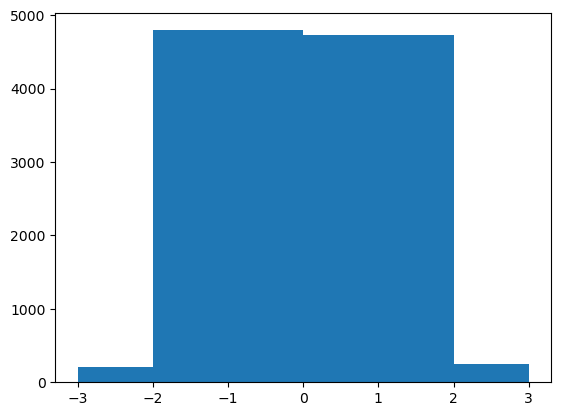

In [276]:
plt.hist(
    x = np.random.randn(10000),
    bins = [-3.0,-2.0,0.0,2.0,3.0]
);

## B. 사용히는 방법

In [277]:
def greet(name: str) -> str:
    return f"Hello, {name}!"

In [281]:
def add(a: int, b: int) -> int:
    return a + b

## C. 읽는 방법

In [283]:
from typing import List, Tuple, Dict, Optional, Union, Any, Callable

`# 예시1`

In [284]:
def process_items(items: List[str]) -> int:
    return len(items)

# 입력예시: ["apple", "banana", "cherry"]
# 출력예시: 3 

In [285]:
process_items(['apple', 'banana', 'cherry'])

`#`

`# 예시2`

In [288]:
def get_coordinates() -> Tuple[float, float]:
    return (45.0, 90.0)

# 입력 형식 예시: None
# 출력 형식 예시: (45.0, 90.0)

In [289]:
get_coordinates()

`#`

`# 예시3`

In [266]:
def count_words(text: str) -> Dict[str, int]:
    words = text.split()
    return {word: words.count(word) for word in words}

# 입력 형식 예시: "apple banana apple cherry banana apple"
# 출력 형식 예시: {'apple': 3, 'banana': 2, 'cherry': 1}

In [267]:
text = "apple banana apple cherry banana apple"
count_words(text)

`#`

`# 예시4`

In [276]:
def find_item(items: List[str], search: str) -> Optional[int]:
    try:
        return items.index(search)
    except ValueError:
        return None

# 설명: 문자열 리스트에서 특정 문자열의 인덱스를 찾고, 찾지 못하면 `None`을 반환
# 입력 형식 예시: 
# - item: ['apple', 'banana', 'cherry']
# - search: 'banana'
# 출력 형식 예시: 1 또는 None

In [277]:
find_item(['apple', 'banana', 'cherry'], 'banana')

In [278]:
find_item(['apple', 'banana', 'cherry'], 'orange')

In [279]:
print(find_item(['apple', 'banana', 'cherry'], 'orange'))

None

`#`

`# 예시5`

In [284]:
def process_value(value: Union[int, str]) -> str:
    if isinstance(value, int):
        return f"Number: {value}"
    else:
        return f"String: {value}"
    
# 입력 형식 예시: 
# - value: 10  <-- 이것도 가능하고 
# - value: "hello"  <-- 이것도 가능하다
# 출력 형식 예시: "Number: 10" 또는 "String: hello" (문자열) 

In [282]:
process_value(10)

In [283]:
process_value("hello")

`#`

`# 예시6`

In [285]:
def print_value(value: Any) -> None:
    print(value)
    
# 입력 형식 예시
# - value: 아무거나
# 출력 형식 예시
# - None 

In [246]:
print_value(123)

123

In [247]:
print_value('hello')

hello

`#`

`# 예시7`

In [290]:
def apply_function(x: int, func: Callable[[int], float]) -> float:
    return func(x)

# 입력형식예시
# - x: 1 
# - func: np.sqrt,  <-- 이런건 가능. int를 입력으로 받아서, float형을 리턴하는 callable object
# - func: lambda x: x**2,  <-- 이런건 권장X. int를 입력으로 받아서, int형을 리턴하니까..
# 출력형식예시
# - 1.7320508075688772

In [291]:
apply_function(3,np.sqrt)

`#`

# 6. 데코레이터

## A. 개념

`-` 데코레이터 쓰는법

1.  함수입력,함수출력을 수행하는 함수를 만든다.
2.  입력함수 위에 데코를 쓴다. 그러면 그 입력함수는 출력함수로 바뀐다.

`-` 데코레이터 코드 템플릿1 – 이걸 외우진 마세요

**데코레이터 선언**

``` python
def decorator_name(func):
    ...
    return wrapper
```

``` python
def 꾸밈함수이름(입력함수):
    ... 
    return 출력함수
```

**데코레이터 사용**

``` python
@decorator_name
def myfunc():
    pass
```

``` python
@꾸밈함수이름
def 꾸밈당하는함수():
    pass 
```

`# 예제1` – 코드 템플릿1: 사용예시

In [293]:
# 데코레이터 선언
def 무조건메롱을리턴(func):
    wrapper = lambda x: "메롱"
    return wrapper

In [294]:
def f(x):
    return x**2
list(map(f,[1,2,3,4,5]))

In [295]:
@무조건메롱을리턴
def f(x):
    return x**2
list(map(f,[1,2,3,4,5]))

`#`

`# 예제2` – 데코레이터와 같은코드

`-` 코드1

In [299]:
def 무조건메롱을리턴(func):
    wrapper = lambda x: "메롱"
    return wrapper

def f(x):
    return x**2

f = 무조건메롱을리턴(f)

[f(x) for x in range(5)]

`-` 코드2

In [300]:
def 무조건메롱을리턴(func):
    wrapper = lambda x: "메롱"
    return wrapper

@무조건메롱을리턴
def f(x):
    return x**2

[f(x) for x in range(5)]

`-` 좀 더 확장하면..

**코드1**

``` python
@dec2
@dec1
def func(arg1, arg2, ...):
    pass
```

**코드2**

``` python
def func(arg1, arg2, ...);
    pass 
func = dec2(dec1(func))
```

코드1과 코드2를 두번쓸 수 있음

`-` 데코레이터 코드 템플릿2 – 아래의 형태를 기억할것

``` python
def decorator_name(func):
    def wrapper(*args, **kwargs):
        func_result = func(*args, **kwargs)
        return func_result
    return wrapper
```

``` python
def 아무것도안꾸미는함수(입력함수):
    def 출력함수(*args, **kwargs):
        입력함수의출력 = 입력함수(*args, **kwargs)
        return 입력함수의출력
    return 출력함수
```

위의 코드는 아무것도 안꾸미는 코드

## B. 대표예시

`# 예제1` – 출력결과는 항상 리스트로

In [734]:
def 출력은리스트로(func):
    def wrapper(*args,**kwargs):
        func_result = func(*args,**kwargs)
        return list(func_result)
    return wrapper

In [740]:
def 입력은넘파이로(func):
    def wrapper(*args,**kwargs):
        args = [np.array(l) for l in args]
        kwargs = {k:np.array(v) for k,v in kwargs.items()}
        func_result = func(*args,**kwargs)
        return func_result
    return wrapper

In [741]:
@출력은리스트로
@입력은넘파이로
def add(a,b):
    return a+b    

In [742]:
add([1,2],[3,4])

In [743]:
add(a=[1,2],b=[3,4])

In [744]:
add([1,2,3],b=[2,3,4])

`#`

`# 예시2` – 실행시간측정

In [344]:
def 시간측정(func):
    def wrapper(*args,**kwargs):
        t1 = time.time()
        func_result = func(*args,**kwargs)
        t2 = time.time()
        print(f"실행시간: {t2-t1}")
        return func_result 
    return wrapper

In [347]:
@시간측정
@출력은리스트로
@입력은넘파이로
def sub(a,b):
    return a-b 

In [348]:
sub([1,2,3],[1,2,3])

실행시간: 2.002716064453125e-05

`#`

`# 예시3` – 출력결과 시각화

In [349]:
def 출력시각화(func):
    def wrapper(*args,**kwargs):
        func_result = func(*args,**kwargs)
        plt.plot(func_result,'--o')
        return func_result 
    return wrapper

In [359]:
@시간측정
@출력시각화
@출력은리스트로
@입력은넘파이로
def mul(a,b):
    return a*b 

실행시간: 0.006300926208496094

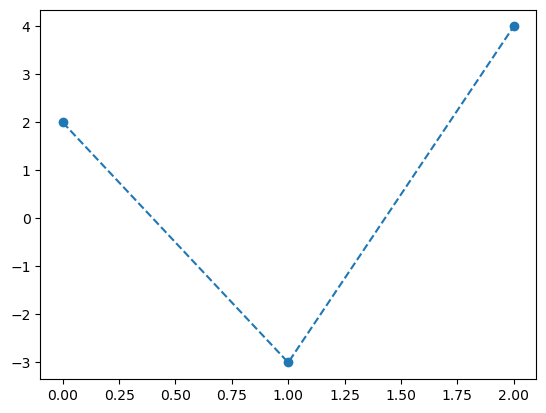

In [360]:
mul([1,-1,1],[2,3,4])

## C. 내장 데코레이터

`-` 아래는 모두 내장데코레이터였음..

``` python
@classmethod
@staticmethod
```

# 7. 제너레이터

## A. 대표예제

`# 예시1` – `for`/`if` 마스터..

In [375]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20); rep = np.random.choice(np.arange(5,21)*5,20); mid = np.random.choice(np.arange(0,21)*5,20); fin = np.random.choice(np.arange(0,21)*5,20)
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin})
df

In [379]:
grades = [] 
for i in range(len(df)):
    row = df.iloc[i]
    att,rep,mid,fin = row 
    total = att*0.1 + rep*0.2 + mid *0.3 + fin*0.4
    if total >= 70: 
        grade =  "A+"
    elif 40 < total: 
        grade = "B0"
    else: 
        grade = "F"
    grades.append(grade)

In [380]:
grades

`#`

`# 예시2` – 사실 머리속에는 파이프라인의 개념이 있지 않나?

In [381]:
row = df.iloc[0]
row

In [382]:
def calculate_total(row):
    att, rep, mid, fin = row 
    total = att*0.1 + rep*0.2 + mid*0.3 + fin*0.4 
    return total

In [383]:
total = calculate_total(row)
total

In [384]:
def make_grade(total):
    if total >= 70: 
        return "A+"
    elif 40 < total: 
        return "B0"
    else: 
        return "F"    

In [385]:
make_grade(total)

In [388]:
# 깔끔 그자체
row = df.iloc[0]
total = calculate_total(row)
grade = make_grade(total) 

In [389]:
# 그렇지만 for문과 결합하면 더러워짐 
n = len(df)
grades = []
for i in range(n):
    row = df.iloc[i]
    total = calculate_total(row)
    grade = make_grade(total)
    grades.append(grade) 
grades

`# 예시3` – 제너레이터의 개발

`-` row-wise 하게 쪼갠다.

In [483]:
def each_row(df):
    n = len(df) 
    for i in range(n):
        yield df.iloc[i]

In [484]:
rows = each_row(df) # 마치 rows = [row1,row2,...] 와 같은 형태로 있다고 생각하자.

`-` total을 계산한다. (row 별로)

In [485]:
def calculate_total(rows):
    for row in rows:
        att, rep, mid, fin = row 
        total = att*0.1 + rep*0.2 + mid*0.3 + fin*0.4 
        yield total

In [486]:
totals = calculate_total(rows)  # totals = [total1,total2,...] 와 같은 형태로 있다고 생각하자. 

`-` grade를 계산한다 (row별로)

In [410]:
def make_grade(totals):
    for total in totals:
        if total >= 70: 
            yield "A+"
        elif 40 < total: 
            yield "B0"
        else: 
            yield "F"

In [411]:
grades = make_grade(totals)  # grades = [grade1,grade2,...] 와 같은 형태로 있다고 생각하자.

`-` 합친다.. (형태변환)

In [412]:
list(grades)

`-` 최종코드

In [415]:
#list(make_grade(calculate_total(each_row(df))))

In [487]:
rows = each_row(df) 
totals = calculate_total(rows)
grades = make_grade(totals)
df.assign(grade = list(grades))

`#`

## B. 제너레이터의 개념

`-` 제너레이터의 정체: 이터레이터 + $\alpha$

In [438]:
lst = [1,2,3] 
lst_iterator = iter(lst) 

In [439]:
isinstance(lst_iterator,collections.abc.Iterator), isinstance(lst_iterator,collections.abc.Generator)

In [440]:
def make_gen(lst):
    for l in lst:
        yield l 

In [441]:
lst_generator = make_gen(lst)

In [442]:
isinstance(lst_generator,collections.abc.Iterator), isinstance(lst_generator,collections.abc.Generator)

In [425]:
set(dir(lst_generator))-set(dir(lst_iterator))

-   제너레이터는 이터레이터에 추가하여 위의 기능들이 있음.
-   저는 저걸 딱히 쓴적이 없어요.. (책에도 별로 추천안함)
-   그냥 제너레이터 = 이터레이터 라고 생각하세요

`-` 만드는 방법1: 함수를 이용하는 방법

In [491]:
def make_gen(lst):
    for l in lst:
        yield l

In [492]:
make_gen([1,2,3])

`-` 만드는 방법2: 제너레이터 표현식 (튜플 컴프리헨션이라고 속으로
생각해도 무방, 튜플 컴프리헨션은 없는 용어임)

In [501]:
(l for l in [1,2,3])

## C. 개념을 위한 예제들

`# 예시1`

In [511]:
def make_gen():
    yield 1
    yield 2
    yield 3
gen = make_gen()

In [512]:
for i in gen:
    print(i)

1
2
3

In [513]:
gen = make_gen()

In [514]:
next(gen)

In [515]:
next(gen)

In [516]:
next(gen)

In [517]:
next(gen)

`#`

`# 예시2` – 무한시퀀스 + 지연실행

In [532]:
def make_gen():
    a = 3 
    yield a 
    while True:
        a = a+2 
        yield a 

In [533]:
gen = make_gen()

In [535]:
lst = [] 

In [536]:
for _ in range(10):
    lst.append(next(gen))

In [537]:
lst

In [538]:
for _ in range(10):
    lst.append(next(gen))

In [539]:
lst

`#`

# 8. 상속

## A. 상속의 사용방법

`-` 클래스를 조금 수정하고 싶을때, 아래와 같은 문법을 이용하면 편리하다.

``` python
class 새로운_클래스_이름(수정할_클래스_이름): 
    def 수정_및_추가할_함수이름(self,...):
        ...
```

`# 예시1` – UpJump

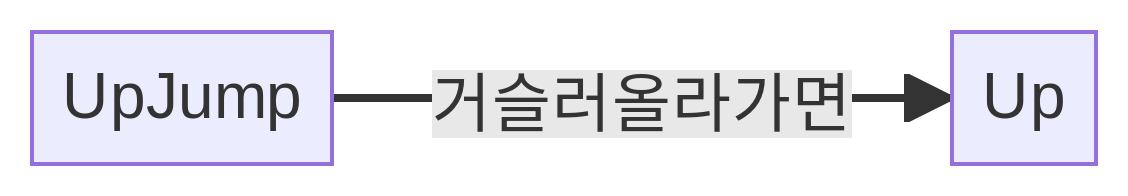

In [93]:
class Up:
    def __init__(self):
        self.value = 0
    def up(self):
        self.value = self.value + 1 
    def __repr__(self):
        return str(self.value) 

In [94]:
class UpJump(Up):
    def jump(self,jump_size):
        self.value = self.value + jump_size

`#`

`# 예시2` – `AddMul` 클래스

`-` Add 클래스 선언

In [105]:
class Add:
    def __init__(self,a,b):
        self.a = a 
        self.b = b 
    def add(self):
        return self.a + self.b 

In [108]:
a = Add(2,3)

In [109]:
a.add()

In [110]:
a.mul()

`-` Mul 클래스 선언

In [113]:
class Mul:
    def __init__(self,a,b):
        self.a = a 
        self.b = b 
    def mul(self):
        return self.a * self.b 

In [114]:
a = Mul(3,4)
a.mul()

In [115]:
a.add()

`-` AddMul 클래스를 선언 (기존의 Add, Mul 상속받아서 이용)

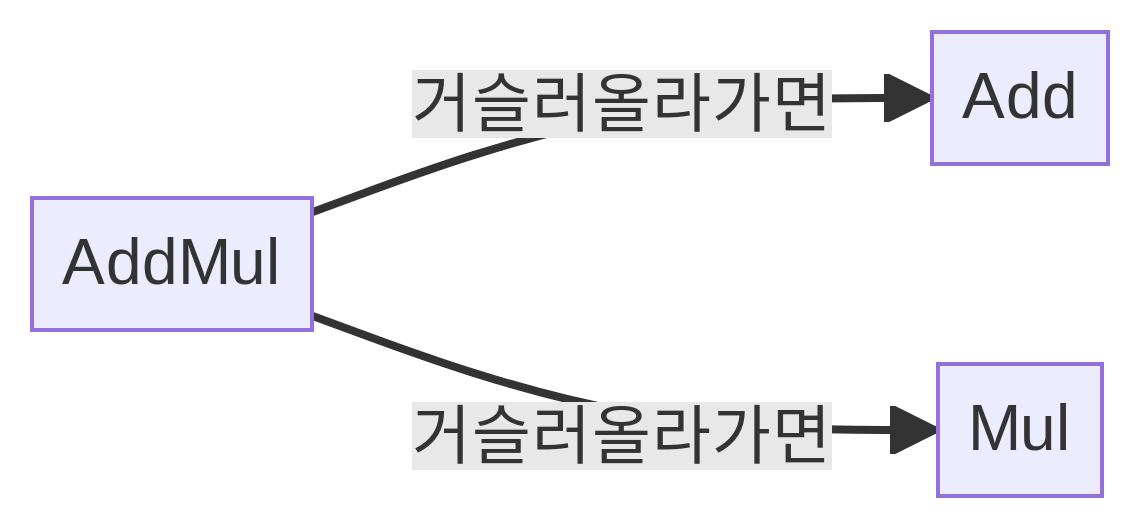

In [116]:
class AddMul(Add,Mul):
    pass 

In [119]:
a = AddMul(2,3)

In [120]:
a.add()

In [121]:
a.mul()

> 어, 근데 `__init__`이 겹치지 않나?

In [122]:
class Add:
    def __init__(self,a,b):
        print("Add클래스에서 정의된 __init__ 메소드가 실행됩니다")
        self.a = a 
        self.b = b 
    def add(self):
        return self.a + self.b 
class Mul:
    def __init__(self,a,b):
        print("Mul클래스에서 정의된 __init__ 메소드가 실행됩니다")        
        self.a = a 
        self.b = b 
    def mul(self):
        return self.a * self.b    
class AddMul(Add,Mul):
    pass     

In [124]:
a = AddMul(5,6)

Add클래스에서 정의된 __init__ 메소드가 실행됩니다

-   알아서 교통정리함

`-` 교통정리하는 비법?

In [125]:
AddMul.__mro__

개념상 아래와 같은 서열인데,

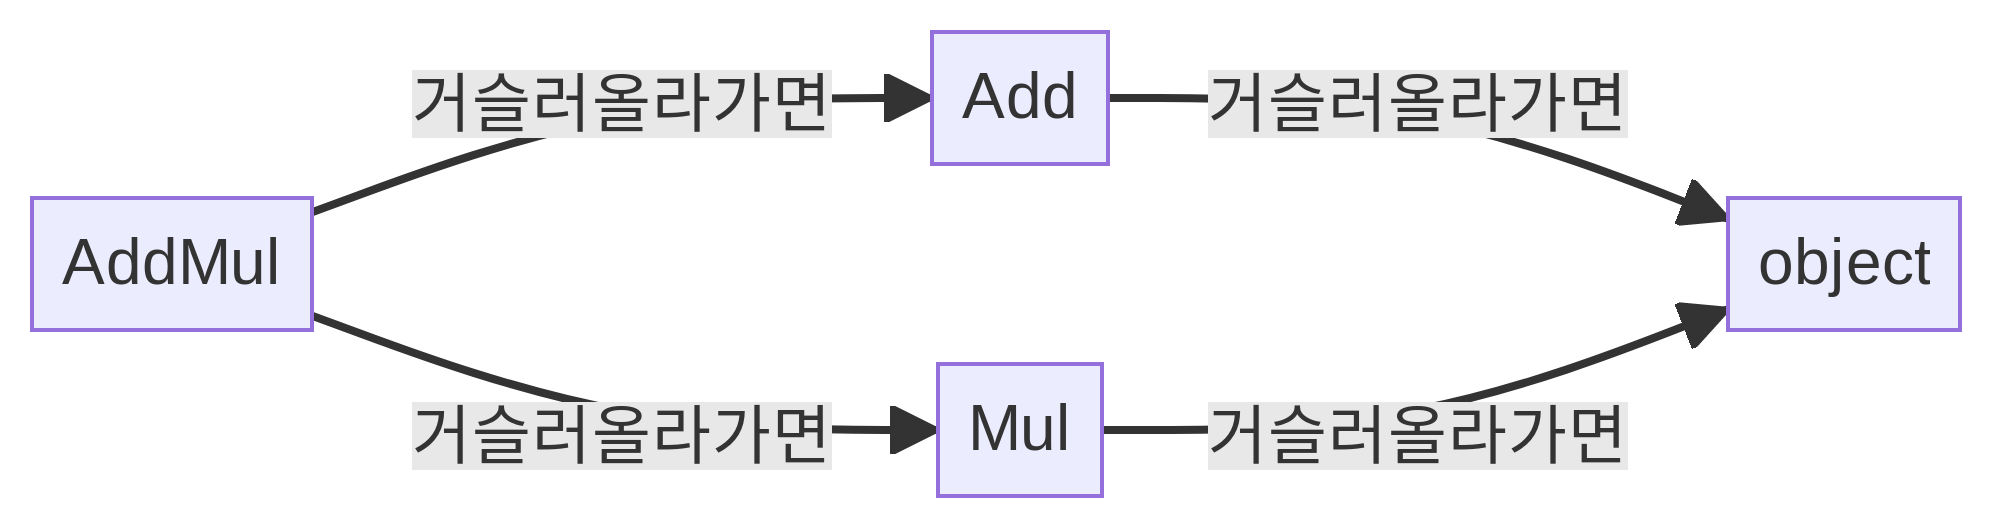

공식적으로는 아래와 같은 서열로 이해한다.

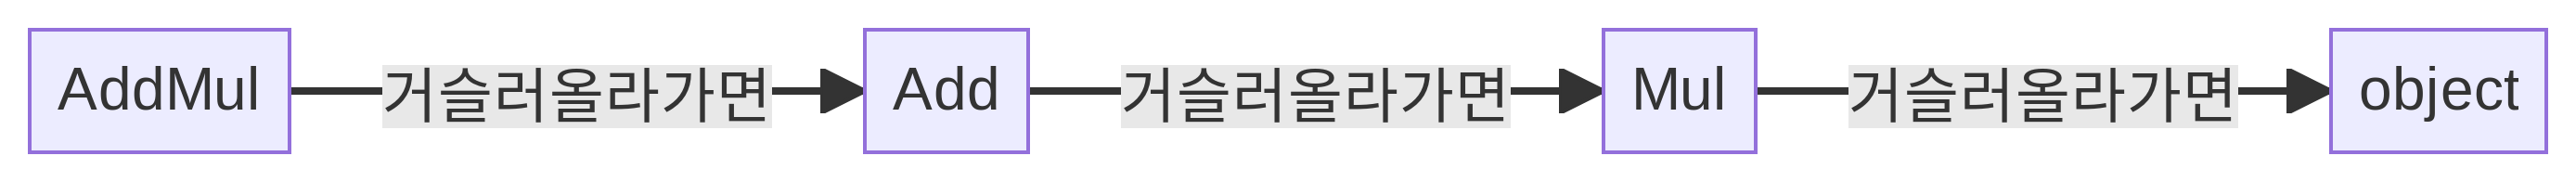

> **Note**
>
> 모든 상속구조를 거슬러 올라가면 피라미드의 정점에 `object` 클래스가
> 있다. 즉 `object`는 최상위 super 클래스이다. 아래의 말을 기억하자.
>
> > 모든 클래스는 `type` 클래스에서 찍힌 인스턴스이며, 모든 클래스는
> > `object` 클래스의 subclass이다.
>
> 그냥 개념놀음임..

> **Warning**
>
> 다이어그램 표시시 object는 앞으로 생략하겠음.

> **Note**
>
> 아래는 같은코드임
>
> ``` python
> # 코드1
> class Klass():
>     pass
> ```
>
> ``` python
> # 코드2
> class Klass(object):
>     pass
> ```
>
> 코드1은 사실상 코드2의 생략버전임.

`#`

## B. `super()`

`# 예시1` – 기본적인 사용법

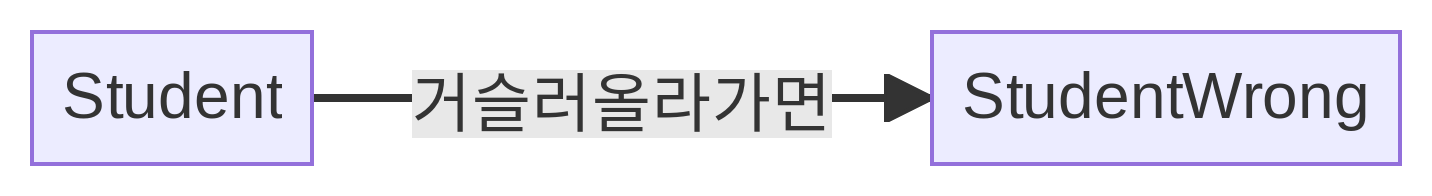

In [118]:
class StudentWrong:
    def __init__(self,age=20.0, semester=0):
        self.age = age 
        self.semester = semester
        print(f"입학을 축하합니다. 당신의 나이는 {self.age}이고 현재 학기는 {self.semester}학기 입니다.")
    def __repr__(self):
        text = f"나이: {self.age}\n학기: {self.semester}"
        return text
    def __add__(self,registration_status):
        if registration_status == "휴학":
            self.age = self.age +0.5 
        elif registration_status == "등록":
            self.age = self.age +0.5 
            self.semester = self.semester + 1
class Student(StudentWrong):
    def __add__(self,registration_status):
        #super().__add__(registration_status) # 방법1 
        super(Student,self).__add__(registration_status) # 방법2 
        return self

In [542]:
boram = Student()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.

In [543]:
boram + "휴학" + "등록"

`#`

`-` `super()`는 슈퍼클래스의 인스턴스 비슷한걸 리턴해준다. (유령이라
생각하자)

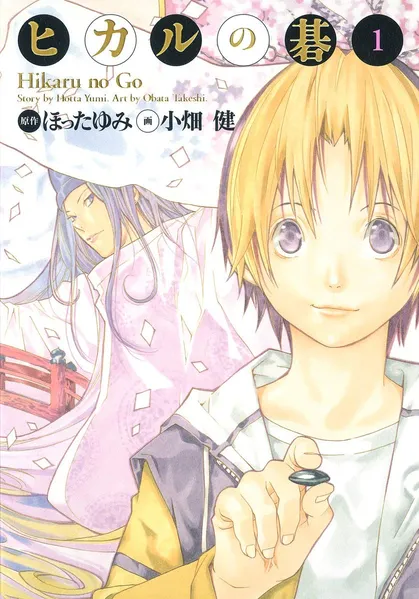

`# 예시2` – 빙의

아래와 같은 문제를 풀고 싶다고 하자.

1.  사과가 2개씩 3묶음 있다. 사과는 몇개인가?
2.  규빈은 지금 2층에 있다. 3층 아래로 내려가면 몇층인가?
3.  \[1,2,3\]의 평균은 얼마인가?
4.  100을 3으로 나누면 나머지가 얼마인가?
5.  2와 3의 최소공배수는 무엇인가?

In [119]:
class ProblemSolver1():
    def __init__(self):
        self.sheet = ["???"]*5
    def solve(self):
        print("0. 사과가 2개씩 3묶음 있다. 사과는 몇개인가? --> 6개")
        self.sheet[0] = "6개"

In [120]:
solver1 = ProblemSolver1()

In [121]:
solver1.sheet

In [122]:
solver1.solve()

0. 사과가 2개씩 3묶음 있다. 사과는 몇개인가? --> 6개

In [123]:
solver1.sheet

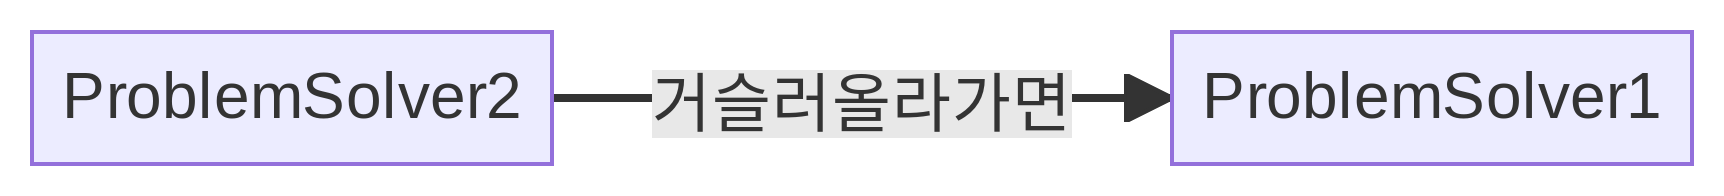

In [134]:
class ProblemSolver2(ProblemSolver1):
    def solve(self):
        ghost1 = super()
        ghost1.solve()
        print("2. [1,2,3]의 평균은 얼마인가? --> 2")
        print("3. 100을 3으로 나누면 나머지가 얼마인가? --> 1")
        print("4. 2와 3의 최소공배수는 무엇인가? --> 6")
        self.sheet[2] = "2"
        self.sheet[3] = "1"
        self.sheet[4] = "6"        

In [135]:
solver2 = ProblemSolver2()

In [136]:
solver2.sheet

In [137]:
solver2.solve()

0. 사과가 2개씩 3묶음 있다. 사과는 몇개인가? --> 6개
2. [1,2,3]의 평균은 얼마인가? --> 2
3. 100을 3으로 나누면 나머지가 얼마인가? --> 1
4. 2와 3의 최소공배수는 무엇인가? --> 6

In [138]:
solver2.sheet

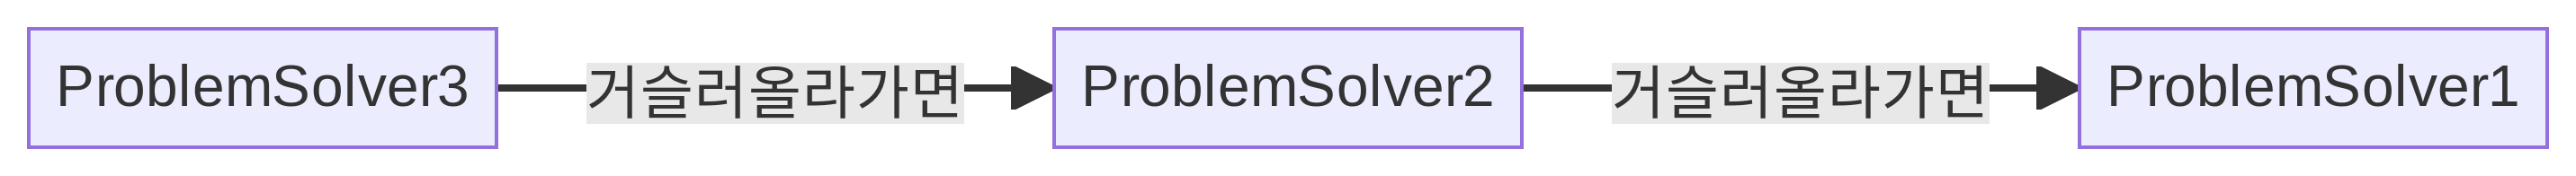

In [146]:
class ProblemSolver3(ProblemSolver2):
    def solve(self):
        ghost2 = super()
        ghost2.solve() 
        print("1. 규빈은 지금 2층에 있다. 3층 아래로 내려가면 몇층인가? --> 지하1층")
        self.sheet[1] = "지하1층"
    def say(self):
        print("다풀었어요")

In [147]:
solver3 = ProblemSolver3()

In [148]:
solver3.sheet

In [149]:
solver3.solve()
#a.sheet

0. 사과가 2개씩 3묶음 있다. 사과는 몇개인가? --> 6개
2. [1,2,3]의 평균은 얼마인가? --> 2
3. 100을 3으로 나누면 나머지가 얼마인가? --> 1
4. 2와 3의 최소공배수는 무엇인가? --> 6
1. 규빈은 지금 2층에 있다. 3층 아래로 내려가면 몇층인가? --> 지하1층

In [150]:
solver3.sheet

In [151]:
solver3.say()

다풀었어요

***그런데 2층에서 3층 아래로가면 사실 지하 2층이다..***

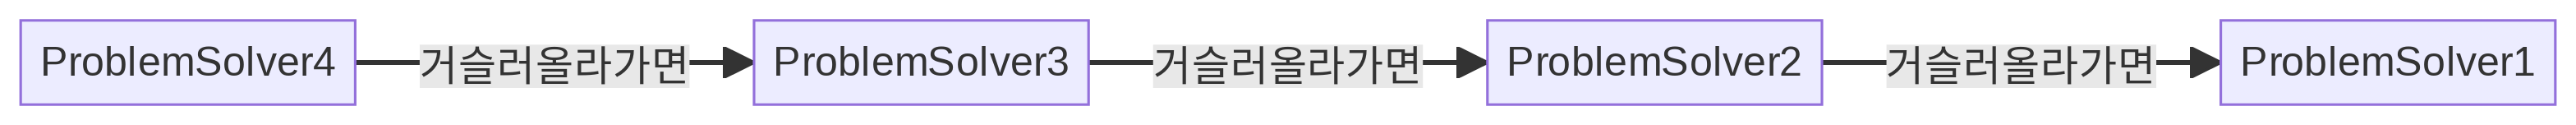

In [174]:
class ProblemSolver4(ProblemSolver3):
    def solve(self):
        ghost2 = super(ProblemSolver3,self) 
        ghost2.solve()
        print("1. 규빈은 지금 2층에 있다. 3층 아래로 내려가면 몇층인가? --> 지하2층")
        self.sheet[1] = "지하2층"

In [175]:
solver4 = ProblemSolver4()
solver4.sheet 

In [176]:
solver4.solve()

0. 사과가 2개씩 3묶음 있다. 사과는 몇개인가? --> 6개
2. [1,2,3]의 평균은 얼마인가? --> 2
3. 100을 3으로 나누면 나머지가 얼마인가? --> 1
4. 2와 3의 최소공배수는 무엇인가? --> 6
1. 규빈은 지금 2층에 있다. 3층 아래로 내려가면 몇층인가? --> 지하2층

In [177]:
solver4.sheet

In [178]:
solver4.say()

다풀었어요

`-` `ProblemSolver4`를 아래와 같이 구현한다면? (틀린구현) // 빙의개념을
이해할것

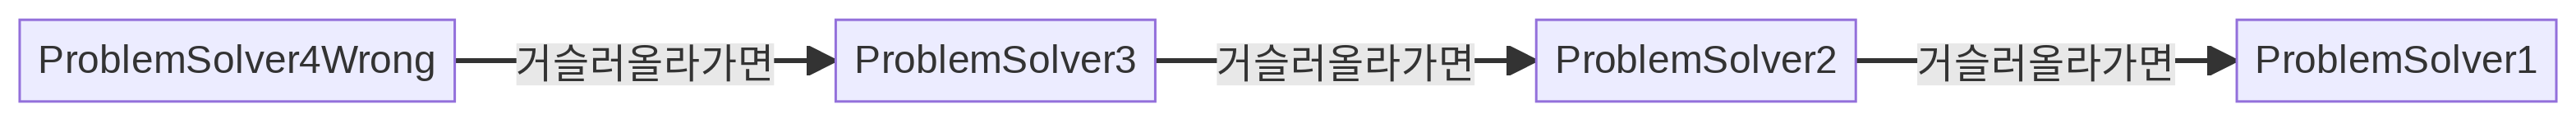

In [194]:
class ProblemSolver4Wrong(ProblemSolver3):
    def solve(self):
        # ghost2 = super(ProblemSolver3,self) 
        # ghost2.solve()
        solver2 = ProblemSolver2() 
        solver2.solve()
        print("1. 규빈은 지금 2층에 있다. 3층 아래로 내려가면 몇층인가? --> 지하2층")
        self.sheet[1] = "지하2층"

In [191]:
solver4 = ProblemSolver4Wrong()
solver4.sheet 

In [192]:
solver4.solve()

0. 사과가 2개씩 3묶음 있다. 사과는 몇개인가? --> 6개
2. [1,2,3]의 평균은 얼마인가? --> 2
3. 100을 3으로 나누면 나머지가 얼마인가? --> 1
4. 2와 3의 최소공배수는 무엇인가? --> 6
['6개', '???', '2', '1', '6']
['???', '???', '???', '???', '???']
1. 규빈은 지금 2층에 있다. 3층 아래로 내려가면 몇층인가? --> 지하2층

In [193]:
solver4.sheet

In [186]:
solver4.say()

다풀었어요

`#`

## C. `super()` 쓰지 않기

`-` 예전에는 `super()`가 없었다고 한다.

`# 예제1` – super()를 이용 vs 이용하지 않음

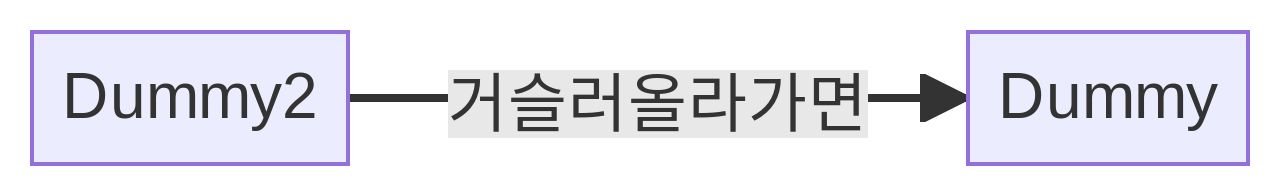

*직선상속*

`-` 코드1: `super()` 사용 – 권장

In [713]:
class Dummy:
    def __init__(self):
        self.a = 0 
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨")

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0         
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨")  
    
a = Dummy2()

인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨
인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨

`-` 코드2: `super()` 사용X – 권장X

In [714]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        Dummy.__init__(self)
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨")        
    
a = Dummy2()

인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨
인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨

`#`

`# 예제2` – 안쓰는 이유

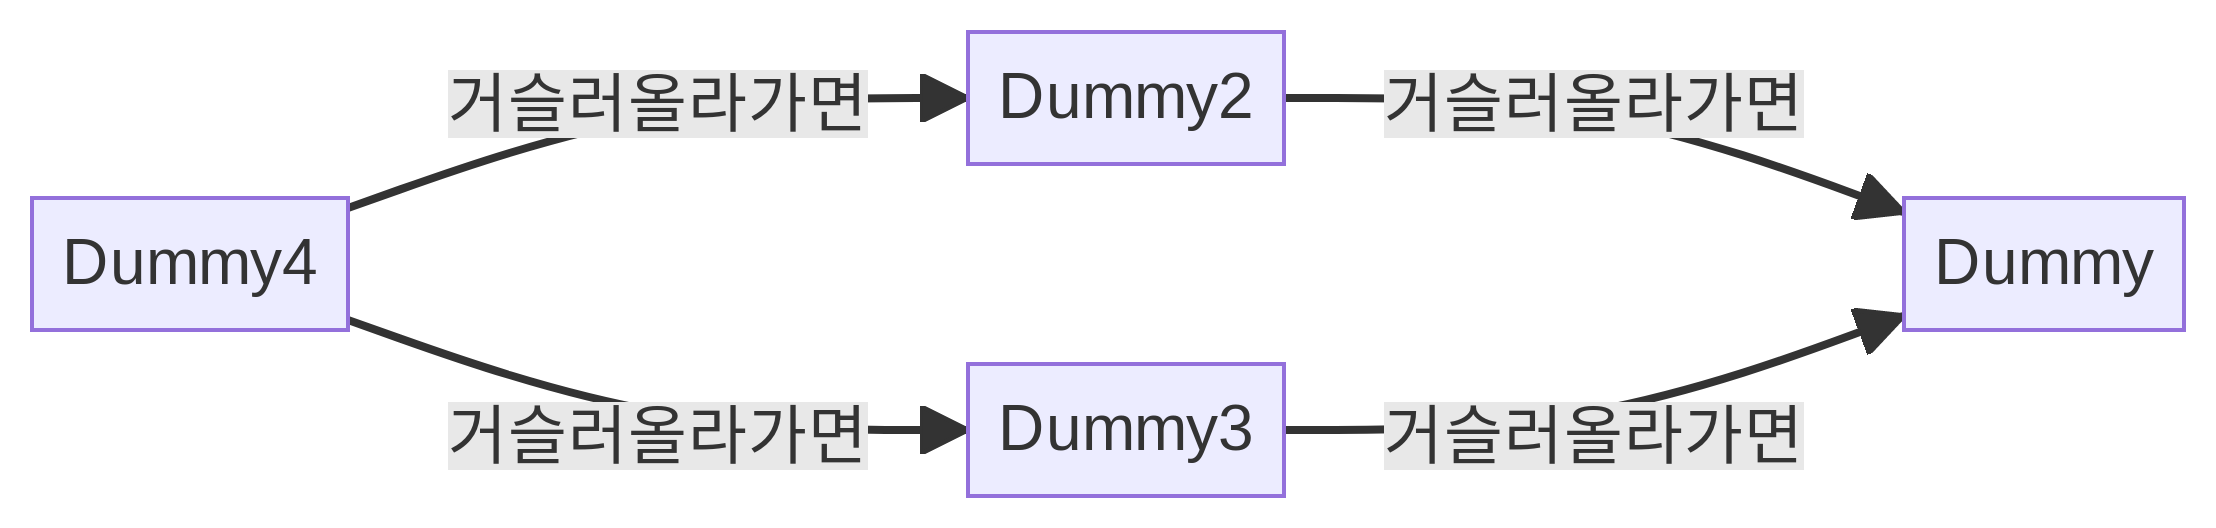

*다이아몬드상속*

`-` 코드1: `super()` 사용 – 권장

In [715]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 정의됨")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        super().__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨
인스턴스생성 -- self.c=0 대입 / Dummy3에서 정의됨
인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨
인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨

`-` 코드2: `super()` 사용X – 권장X

In [716]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):        
        Dummy.__init__(self)
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨")        

class Dummy3(Dummy):
    def __init__(self):        
        Dummy.__init__(self)
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 정의됨")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        Dummy2.__init__(self)
        Dummy3.__init__(self)
        self.d = 0 
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨
인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨
인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨
인스턴스생성 -- self.c=0 대입 / Dummy3에서 정의됨
인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨

`-` 원리

In [717]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 정의됨")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        super().__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨
인스턴스생성 -- self.c=0 대입 / Dummy3에서 정의됨
인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨
인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨

In [719]:
Dummy4.mro()

`Dummy4.__mro__` 를 타고 올라가서 제일 꼭대기부터 한번씩만 `__init__()`
을 실행함.

`#`

`# 예제3` – 오개념 방지를 위한 예제들

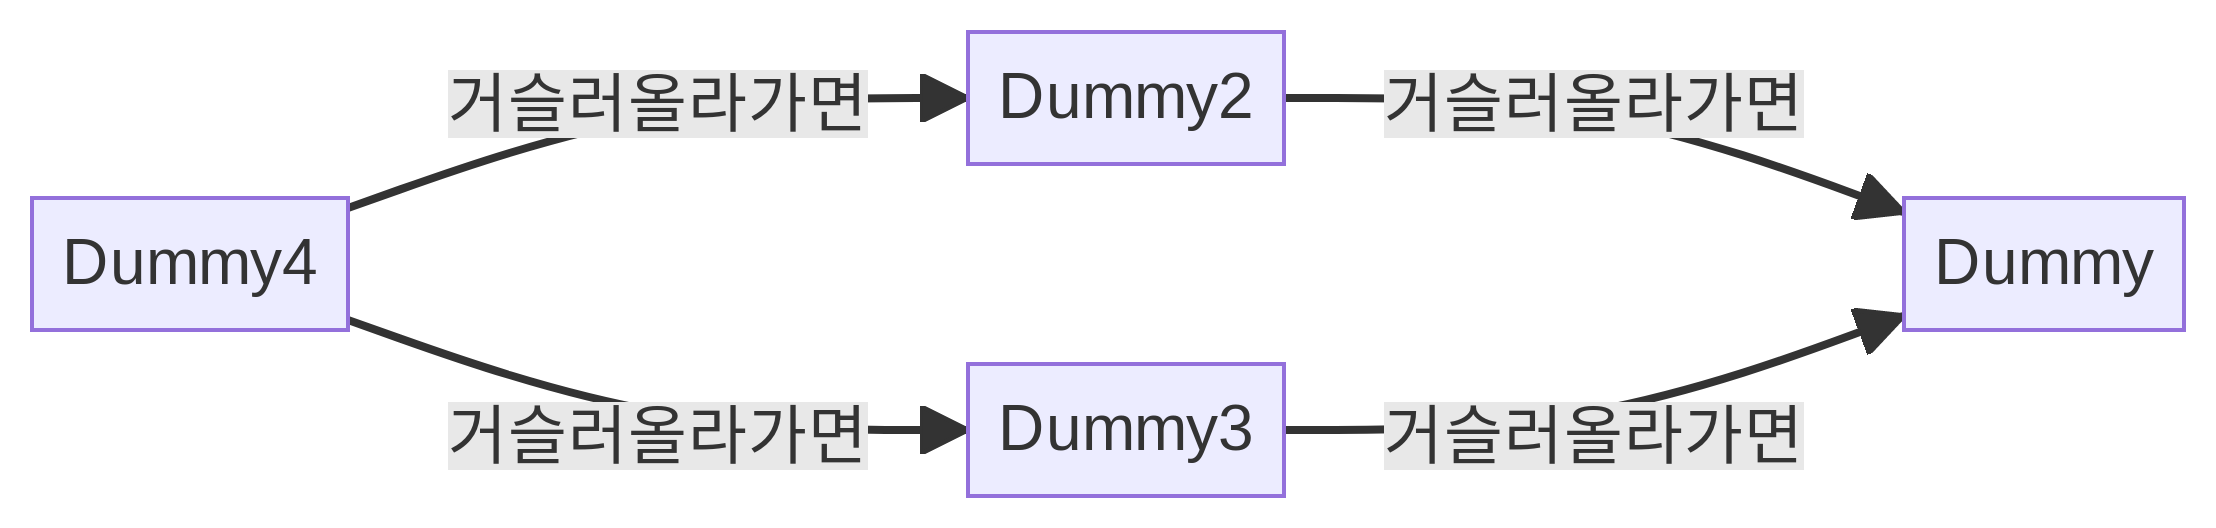

*다이아몬드상속*

`-` 코드1: 결과를 예상해보자.

In [696]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 정의됨")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        super(Dummy2,self).__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨
인스턴스생성 -- self.c=0 대입 / Dummy3에서 정의됨
인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨

우리가 원한건

    인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
    인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행

였는뎅..

왜 이런일이?

`-` `mro/super`는 상속순서를 직선으로 재정렬함

개념적으로는 아래구조의 상속이지만

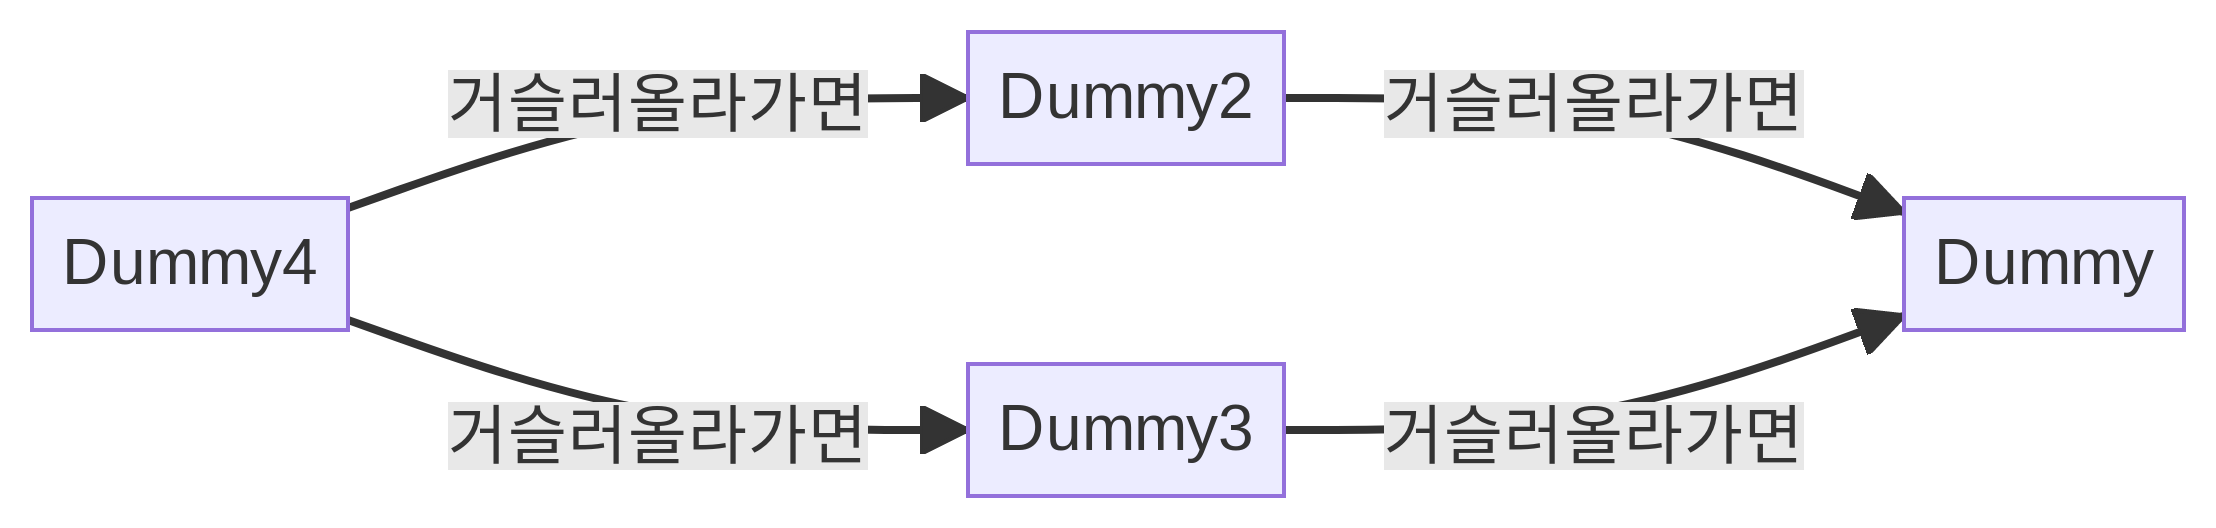

실제로는 아래구조의 상속임

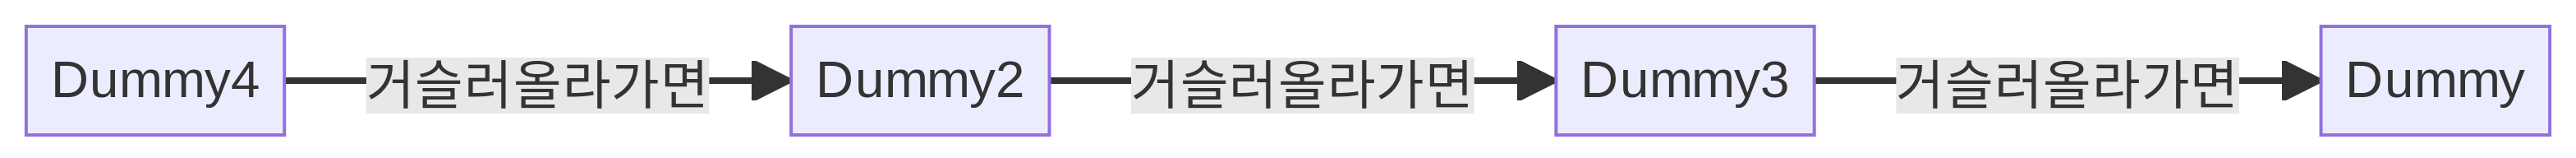

In [697]:
Dummy4.mro()

따라서 `super(Dummy2,self)` 가 구체화하는건 Dummy의 유령인스턴스가
아니라 Dummy3의 유령인스턴스임

`-` 코드2: 결과를 예상해보자.

In [720]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 정의됨")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        Dummy.__init__(self)
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨
인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨

> 이러면 혼란이 없음

`-` 코드3: 결과를 예상해보자.

In [700]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 정의됨")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 정의됨")
        
class Dummy4(Dummy3,Dummy2):
    def __init__(self):
        super(Dummy2,self).__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 정의됨
인스턴스생성 -- self.d=0 대입 / Dummy4에서 정의됨

> `super()`를 굳이 써야겠으면 Dummy4를 정의할때 mro를 고려하여
> `class Dummy4(Dummy2,Dummy3):` 대신에 `class Dummy4(Dummy3,Dummy2):`
> 로 바꿔주면 된다.

`#`

## D. 리스트의 상속 – 쓰지마세여

`-` list와 비슷한데 멤버들의 빈도가 계산되는 메소드를 포함하는 새로운
나만의 list를 만들고 싶다.

In [721]:
lst = list('asdfasssdfa')
lst 

`-` 각 원소들의 빈도를 구해보면 아래와 같다.

In [722]:
{s:lst.count(s) for s in set(lst)}

In [723]:
lst.freq() # 이렇게 실행하면 위의결과가 나왔으면 좋겠다.

`-` 이것을 내가 정의하는 새로운 list의 메소드로 넣고 싶다.

In [724]:
class List(list):
    def freq(self):
        return {s:self.count(s) for s in set(self)}

In [725]:
lst2 = List('asdfasssdfa')

In [726]:
lst2

In [727]:
lst

In [731]:
#lst2+lst ## 거의 lst2는 일반적인 lst와 같은역할

`-` 기존리스트에서 추가로 frequency() 메소드가 존재함.

In [732]:
lst2.freq()

In [ ]:
lst.freq()

> **Warning**
>
> 사실 내장클래스의 상속은 추천하지 않는다. 여러가지 문제가 생기기
> 때문..

# 9. 에러메시지

## A. 파이썬의 에러메시지

`TypeError`: 타입이 맞지 않는 연산을 수행하려고 할 때 발생. 예를 들어,
숫자와 문자열을 더하려고 할 때 발생.

In [745]:
result = 10 + "20"  # TypeError: unsupported operand type(s) for +: 'int' and 'str'

`SyntaxError`: 코드의 구문이 잘못되었을 때 발생. 주로 오타, 괄호 불일치,
콜론(:) 빠뜨림 등의 문제로 인해 발생.

In [752]:
x = 5
if x == 5
    print("x is equal to 5")  # SyntaxError: invalid syntax

`NameError`: 정의되지 않은 변수나 함수를 사용하려고 할 때 발생.

In [753]:
print(unknown_variable)  # NameError: name 'unknown_variable' is not defined

`ValueError`: 함수나 메서드에 전달되는 인자의 값이 올바르지 않을 때
발생.

In [31]:
int_value = int("abc")  # ValueError: invalid literal for int() with base 10: 'abc'

`AttributeError`: 객체가 속성(attribute)이나 메서드(method)를 가지고
있지 않을 때 발생

In [32]:
my_list = [1, 2, 3]
my_list.append(4)
my_list.upper()  # AttributeError: 'list' object has no attribute 'upper'

`ImportError`: 모듈을 임포트하는 과정에서 문제가 발생할 때 발생.
임포트하려는 모듈이 존재하지 않거나, 임포트 경로 설정이 잘못된 경우에
해당.

In [33]:
import non_existent_module  # ImportError: No module named 'non_existent_module'

`IOError`: 파일 입출력 작업 중에 발생하는 에러. 파일이 존재하지 않거나,
파일에 쓰기 권한이 없는 경우 등에 해당.

In [34]:
file = open('file.txt', 'r')  # IOError: [Errno 2] No such file or directory: 'file.txt'

`KeyboardInterrupt`: 사용자가 프로그램의 실행을 중단할 때 발생.

In [755]:
while True:
    pass  # 무한 루프
# KeyboardInterrupt: 

`IndexError`: 유효하지 않은 인덱스를 사용하여 시퀀스(리스트, 튜플,
문자열 등)의 요소에 접근하려고 할 때 발생.

In [756]:
my_list = [1, 2, 3]
print(my_list[5])  # IndexError: list index out of range

`KeyError`: 딕셔너리에서 존재하지 않는 키를 사용하여 요소에 접근하려고
할 때 발생.

In [757]:
my_dict = {'name': 'John', 'age': 25}
print(my_dict['address'])  # KeyError: 'address'

`FileNotFoundError`: 존재하지 않는 파일을 열려고 할 때 발생.

In [758]:
file = open('nonexistent_file.txt')  # FileNotFoundError: [Errno 2] No such file or directory: 'nonexistent_file.txt'

`ZeroDivisionError`: 0으로 나누기 연산을 수행하려고 할 때 발생.

In [759]:
result = 10 / 0  # ZeroDivisionError: division by zero

## B. `TypeError`에 대한 심층분석

`-` `.__add__` 가 올바르게 정의되지 않아서 생기는 경우

In [763]:
class StudentWrong:
    def __init__(self,age=20.0, semester=0):
        self.age = age 
        self.semester = semester
        print(f"입학을 축하합니다. 당신의 나이는 {self.age}이고 현재 학기는 {self.semester}학기 입니다.")
    def __repr__(self):
        text = f"나이: {self.age}\n학기: {self.semester}"
        return text
    def __add__(self,registration_status):
        if registration_status == "휴학":
            self.age = self.age +0.5 
        elif registration_status == "등록":
            self.age = self.age +0.5 
            self.semester = self.semester + 1

In [764]:
seoyeon = StudentWrong()
seoyeon + "등록" + "등록"

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.

`-` `.__getitem__`이 정의되지 않은 오브젝트에서 인덱싱을 시도할때 생기는
오류

In [767]:
class Dummy:
    pass 
a = Dummy()
a[0]

`-` `.__setitem__`이 정의되지 않은 오브젝트에서 할당을 시도할때 생기는
오류

In [768]:
class Dummy:
    pass 
a = Dummy()
a[0] = 5

`-` `.__len__` 이 정의되지 않은 오브젝트에서 len을 이용할때 생기는 오류

In [769]:
class Dummy:
    pass 
a = Dummy()
len(a)

`-` `.__call__`이 정의되지 않은 오브젝트를 함수처럼 이용하려 할때 생기는
오류

In [770]:
class Dummy:
    pass 
a = Dummy()
a()

`-` `.__iter__`가 정의되지 않은 오브젝트를 iterable 오브젝트처럼
사용하려 할때 생기는 오류

In [771]:
class Dummy:
    pass 
a = Dummy()
for i in a:
    print(i)

# Appedix: 다루지 못한 주제들

**A,B,C 주제 관련 참고자료**

-   [2022 파이썬입문: 개발환경의 변천사, 1세대 프로그래머부터 5세대
    프로그래머까지](https://guebin.github.io/IP2022/2022/03/28/(4%EC%A3%BC%EC%B0%A8)-3%EC%9B%9428%EC%9D%BC.html)
-   [2022 파이썬입문: 소스코드 관리, 모듈, 패키지,
    라이브러리](https://guebin.github.io/IP2022/2022/04/03/(5%EC%A3%BC%EC%B0%A8)-4%EC%9B%942%EC%9D%BC.html)

**D: with를 사용하는 예시**

-   [2021 데이터시각화 – `matplotlib`
    테마변경](https://guebin.github.io/DV2021/2021/12/08/(14%EC%A3%BC%EC%B0%A8)-12%EC%9B%948%EC%9D%BC.html)
-   [2022 빅데이터분석 특강 –
    `tf.GradientTape`](https://guebin.github.io/STBDA2022/2022/03/28/(4%EC%A3%BC%EC%B0%A8)-3%EC%9B%9428%EC%9D%BC.html#%EB%AF%B8%EB%B6%84)

**E: 깊은복사, 얕은복사 특강**

-   [2023 파이썬프로그래밍: 13wk-1 깊은복사와
    얕은복사](https://guebin.github.io/PP2023/posts/2023-06-21-13wk-1.html)

**G,H: 판다스 및 데이터 시각화관련 자료**

-   [2023 데이터시각화](https://guebin.github.io/DV2023/)

## A. 모듈

``` python
1. .ipynb 파일이 아니라 .py 파일은 뭐지?
2. from ?? import ?? as ?? 이런거 어렵다면?? 
3. __init__.py --> 이게 보인다면?
```

## B. 스크립트실행

``` python
1. 터미널(검은화면)에서 python ??.py 같은걸 실행하는걸 본다면??
2. if __name__ == "__main__": --> 이런게 보인다면?
```

## C. 패키지 제작, 설치

``` python
1. 깃허브에서 setup.py 보인다면?? 
2. pip install 이런걸 알고 싶다면??
3. conda install 이런걸 알고 싶다면??
```

## D. with

``` python
1. 파일열거나 불러올때 많이씀
2. plt.plot 등을 사용할때 테마변경.. 
3. tensorflow 배울때 with를 모르면 gradient tape의 개념을 이해할 수 없음... 
```

## E. 깊은복사, 얕은복사

``` python
1. 아래와 같은 얶까 당할때 있음.. 절대 어디가 틀린지 모름.. 
2. 가능하다면 그냥 모르고 사는게 행복함. 
```

`-` 예시1

In [774]:
a = [1,2,3]
b = a 
b.append(4)
b

In [775]:
a

`#`

`-` 예시2

In [778]:
a = [1] 
b = a  # b=[1] 
a = a+[2] # a=[1,2] 
a = a+[3] # a=[1,2,3] 
a = a+[4] # a=[1,2,3,4] 
a,b

In [2]:
a = [1] 
b = a 
a += [2] 
a += [3]
a += [4] 
a,b

`#`

## G. 시각화

``` python
1. import matplotlib.pyplot as plt
2. import seaborn as sns 
3. from plotnine import * 
4. import plotly.express as px 
```

## H. 판다스

## I. 에러관리

``` python
1. try, except, finally
2. raise
```

## J. collection

``` python
1. from collections import Counter 
2. from collections import deque
3. from collections import OrderedDict
4. from collections import defaultdict
5. from collections import namedtuple
```

In [781]:
from collections import Counter

lst = ['a', 'b', 'c', 'a', 'b', 'a']
counter = Counter(lst)
counter

## K. 기타 유용한 내장패키지

``` python
1. import bisec
2. import heapq
```